In [27]:
import os
import re
import sys
from evaluator import smooth_bleu
import matplotlib.pyplot as plt
import numpy as np

In [2]:
n = -1

In [3]:
def customComputeMaps(pfile, goldfile, line = -1):
    predictionMap = {}
    goldMap = {}
    pf = open(pfile, 'r')
    gf = open(goldfile, 'r')

    for index, row in enumerate(pf):
        cols = row.strip().split('\t')
        if len(cols) == 1:
            (rid, pred) = (cols[0], '')
        else:
            (rid, pred) = (cols[0], cols[1])
        if line != -1:
            if line == index:
                predictionMap[rid] = [smooth_bleu.splitPuncts(pred.strip().lower())]
                break
        else:
            predictionMap[rid] = [smooth_bleu.splitPuncts(pred.strip().lower())]
            
    
    for index, row in enumerate(gf):
        (rid, pred) = row.split('\t')
        if line != -1 and line != index:
            continue
        if rid in predictionMap:  # Only insert if the id exists for the method
            if rid not in goldMap:
                goldMap[rid] = []
            
            if line != -1:
                if line == index:
                    goldMap[rid].append(smooth_bleu.splitPuncts(pred.strip().lower()))
                    break
            else:
                goldMap[rid].append(smooth_bleu.splitPuncts(pred.strip().lower()))

    #sys.stderr.write('Total: ' + str(len(goldMap)) + '\n')
    score = round(smooth_bleu.bleuFromMaps(goldMap, predictionMap)[0], 2)
    return len(goldMap), score

In [37]:
prediction_folder = '/home/CodeT5Experiments/CodeT5/sh/saved_models/finetune3/python/codet5_base_all_lr5_bs8_src512_trg128_pat2_e15/prediction'

In [38]:
source = os.path.join(prediction_folder, 'test_best-bleu.src')
predict = os.path.join(prediction_folder, 'test_best-bleu.output')
gold = os.path.join(prediction_folder, 'test_best-bleu.gold')

In [6]:
customComputeMaps(predict, gold)

(14918, 19.58)

In [39]:
mtl_bleu_scores = [customComputeMaps(predict, gold, line=i) for i in range(14918)]

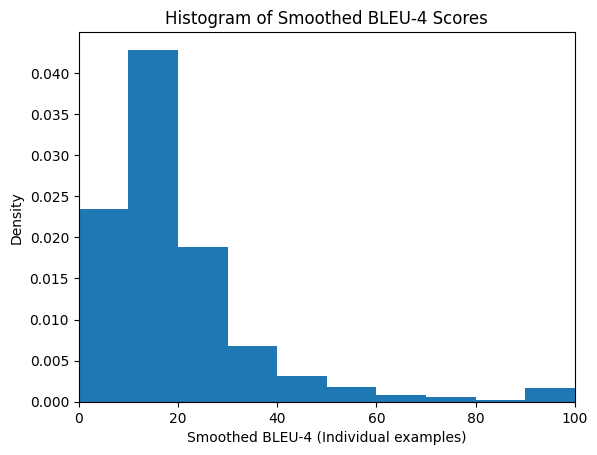

In [19]:
plt.hist([i for _,i in bleu_scores], bins=10, range=(0, 100), density=True)  # arguments are passed to np.histogram
plt.title("Histogram of Smoothed BLEU-4 Scores")
plt.ylabel('Density')
plt.xlabel('Smoothed BLEU-4 (Individual examples)')
ax = plt.gca()
ax.set_xlim([0, 100])
plt.savefig('mtl_bleu4_hist.png')
plt.show()

In [20]:
prediction_folder = '/home/CodeT5Experiments/CodeT5/sh/saved_models/finetune0_prediction'
source = os.path.join(prediction_folder, 'test_best-bleu.src')
predict = os.path.join(prediction_folder, 'test_best-bleu.output')
gold = os.path.join(prediction_folder, 'test_best-bleu.gold')
finetune0_bleu_scores = [customComputeMaps(predict, gold, line=i) for i in range(14918)]

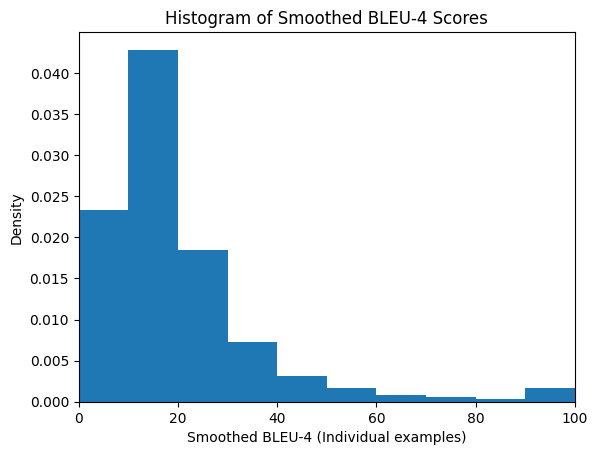

In [21]:
plt.hist([i for _,i in finetune0_bleu_scores], bins=10, range=(0, 100), density=True)  # arguments are passed to np.histogram
plt.title("Histogram of Smoothed BLEU-4 Scores")
plt.ylabel('Density')
plt.xlabel('Smoothed BLEU-4 (Individual examples)')
ax = plt.gca()
ax.set_xlim([0, 100])
plt.savefig('finetune0_bleu4_hist.png')
plt.show()

In [22]:
prediction_folder = '/home/CodeT5Experiments/CodeT5/sh/saved_models/finetune2_prediction'
source = os.path.join(prediction_folder, 'test_best-bleu.src')
predict = os.path.join(prediction_folder, 'test_best-bleu.output')
gold = os.path.join(prediction_folder, 'test_best-bleu.gold')
finetune2_bleu_scores = [customComputeMaps(predict, gold, line=i) for i in range(14918)]

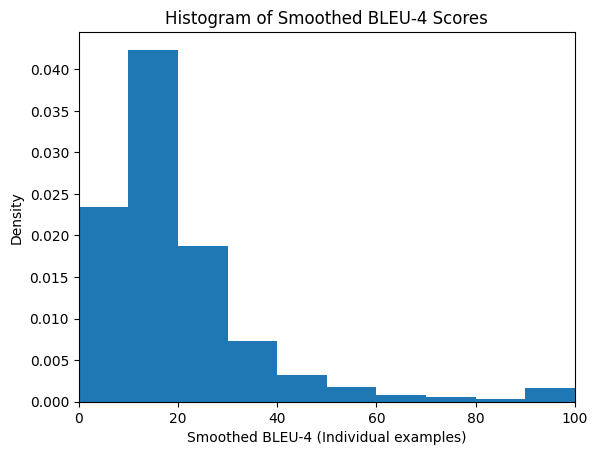

In [23]:
plt.hist([i for _,i in finetune2_bleu_scores], bins=10, range=(0, 100), density=True)  # arguments are passed to np.histogram
plt.title("Histogram of Smoothed BLEU-4 Scores")
plt.ylabel('Density')
plt.xlabel('Smoothed BLEU-4 (Individual examples)')
ax = plt.gca()
ax.set_xlim([0, 100])
plt.savefig('finetune2_bleu4_hist.png')
plt.show()

In [24]:
finetune0_bleu_scores[:10]

[(1, 11.72),
 (1, 22.96),
 (1, 21.74),
 (1, 14.13),
 (1, 19.18),
 (1, 12.88),
 (1, 19.3),
 (1, 53.18),
 (1, 0.0),
 (1, 9.95)]

In [26]:
finetune0_bleu_scores[:10]

[(1, 11.72),
 (1, 22.96),
 (1, 21.74),
 (1, 14.13),
 (1, 19.18),
 (1, 12.88),
 (1, 19.3),
 (1, 53.18),
 (1, 0.0),
 (1, 9.95)]

In [28]:
np.mean([i for _,i in finetune0_bleu_scores])

19.655870089824376

In [29]:
np.mean([i for _,i in finetune2_bleu_scores])

19.69700898243732

In [41]:
sorted_list = sorted(enumerate(finetune0_bleu_scores), key=lambda x: x[1][1])
worst_finetune0 = [(tuple_val[0], tuple_val[1][0], tuple_val[1][1]) for tuple_val in sorted_list]
for index, value in enumerate(worst_finetune0[:10]): # Bottom 10 worst bleu4 for finetune0
    print(f'Worst {index} with finetune0 score: {value[2]} on line {value[0]}, finetune2: {finetune2_bleu_scores[value[0]][1]}, finetune3: {mtl_bleu_scores[value[0]][1]}')

Worst 0 with finetune0 score: 0.0 on line 8, finetune2: 0.0, finetune3: 0.0
Worst 1 with finetune0 score: 0.0 on line 15, finetune2: 0.0, finetune3: 0.0
Worst 2 with finetune0 score: 0.0 on line 21, finetune2: 0.0, finetune3: 5.49
Worst 3 with finetune0 score: 0.0 on line 36, finetune2: 5.49, finetune3: 12.19
Worst 4 with finetune0 score: 0.0 on line 73, finetune2: 19.21, finetune3: 19.21
Worst 5 with finetune0 score: 0.0 on line 107, finetune2: 0.0, finetune3: 0.0
Worst 6 with finetune0 score: 0.0 on line 300, finetune2: 0.0, finetune3: 0.0
Worst 7 with finetune0 score: 0.0 on line 407, finetune2: 0.0, finetune3: 0.0
Worst 8 with finetune0 score: 0.0 on line 409, finetune2: 0.0, finetune3: 0.0
Worst 9 with finetune0 score: 0.0 on line 429, finetune2: 0.0, finetune3: 0.0


In [34]:
sorted_list = sorted(enumerate(finetune2_bleu_scores), key=lambda x: x[1][1])
worst_finetune2 = [(tuple_val[0], tuple_val[1][0], tuple_val[1][1]) for tuple_val in sorted_list]
worst_finetune2[:10] # Bottom 10 worst bleu4 for finetune0

[(8, 1, 0.0),
 (15, 1, 0.0),
 (21, 1, 0.0),
 (107, 1, 0.0),
 (300, 1, 0.0),
 (407, 1, 0.0),
 (409, 1, 0.0),
 (429, 1, 0.0),
 (448, 1, 0.0),
 (466, 1, 0.0)]